In [1]:
from math import factorial
from scipy.stats.distributions import norm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import random
import scipy as sp 

from SALib.analyze import delta
from SALib.analyze import morris
from SALib.analyze import ff
from SALib.analyze import hdmr
from SALib.analyze import rbd_fast
from SALib.analyze import sobol
from typing import Dict, List

In [2]:
import SALib
from SALib.sample import saltelli
from SALib.analyze import sobol
from SALib.test_functions import Ishigami
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('U_AllCombinedResults_2006.csv')
df_1=df
df_1=df_1.dropna()
df_1=df_1.astype('float')
arr= df_1.to_numpy()
df_1

,@@ROOF@@,@@WALL@@,@@FLOOR@@,@@WIN@@,@@SHGC@@,@@LPD@@,@@HEATEFF@@,@@COP@@,@@EPD@@,@@HSP@@,@@CSP@@,@@OCC@@,c0: Annual_T[GJ]
0,2.606044,0.930077,1.704936,2.733776,0.357333,9.363051,3.525834,2.866345,9.534709,23.990872,24.356802,0.066092,1768.695037
1,2.691558,0.805737,1.972810,2.672420,0.370464,9.790006,3.336399,2.844373,10.610612,23.909900,24.089141,0.064407,1892.808774
2,2.490954,0.952444,2.120335,3.212882,0.365143,10.219104,3.567469,2.884792,10.032985,23.007489,23.747162,0.063603,1840.549947
3,2.725902,0.780280,1.690278,2.698750,0.381639,10.702942,3.310289,2.903201,8.609092,22.994690,23.257141,0.064066,1752.909410
4,2.641775,0.830284,2.056681,2.810792,0.393388,10.928119,3.384306,3.118724,8.311315,22.980794,24.760668,0.061518,1683.894394
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2.535003,0.905736,2.053556,2.805198,0.399364,10.430259,3.467142,2.781254,9.971955,23.058829,23.156203,0.060302,1878.645538
496,2.714073,0.925278,1.852049,3.229718,0.388273,10.466870,3.322048,3.107230,9.722265,23.044705,23.632812,0.060429,1819.513210
497,2.274183,0.716695,2.046295,2.889416,0.374901,10.324902,3.485694,3.011969,8.403467,23.031378,23.968834,0.065985,1703.138903
498,2.289899,0.696932,1.826013,2.946866,0.347887,9.428493,3.473370,2.929237,9.604650,23.023587,24.788826,0.068475,1766.726851


In [11]:
problem = {
    'num_vars' : 3,
    'names' : ['x1','x2','x3'],
    'bounds' : [[-3.15,3.84],
                [-6.48,6.75],
                [-3.48,9.78]]
}

In [13]:
param_value = saltelli.sample(problem, 1024)

In [4]:
ishigami_problem= ({
        'num_vars' : 12,
        'names': ['ROOF','@@WAL_Th@@','@@WIN_U-VALUE@@','@@WIN-SHGC@@','@@EPD@@','@@LPD@@','@@HSP@@','@@CSP@@','@@GB COP@@','@@PTHP COP@@','@@INF@@','@@OCC@@'],
        'bounds': [
                [0.10,    0.75595],   # Roof U-value
                [0.10,    1.16300],   # Wall U-value
                [0.5815,  5.815],     # Win U-value
                [0.2,     0.9],       # Win SHGC
                [3,       18],        # EPD  
                [5,       15],        # LPD   
                [18,      24],        # HSP
                [23,      28],        # CSP (CSP < HSP :problem)
                [0.70,    0.99],      # GB COP
                [2.40,    6.50],      # PTHP COP
                [0.25,    1.50],      # INF
                [0.002,   0.060]      # OCC
                ]
})

,delta,delta_conf,S1,S1_conf,names
0,0.033235,0.028971,0.012167,0.028693,ROOF
1,0.045551,0.029849,0.026223,0.031268,@@WAL_Th@@
2,0.035246,0.027080,0.001186,0.017124,@@WIN_U-VALUE@@
3,0.061155,0.027738,0.014292,0.030034,@@WIN-SHGC@@
4,0.049710,0.030646,0.056889,0.051172,@@EPD@@
5,0.057322,0.028917,0.005490,0.024842,@@LPD@@
6,0.076009,0.034191,0.050259,0.035769,@@HSP@@
7,0.406305,0.035634,0.678438,0.050749,@@CSP@@
8,0.139435,0.036446,0.140404,0.067847,@@GB COP@@
9,0.156454,0.037061,0.216724,0.065328,@@PTHP COP@@


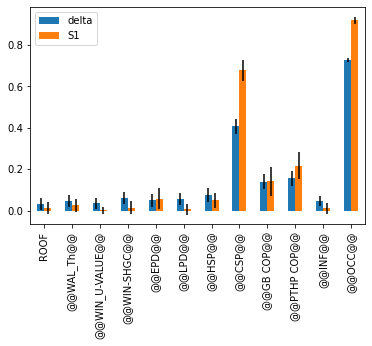

In [16]:
X_delta= arr[0:364,1:13]
Y_delta= arr[0:364,12]
Si_delta = delta.analyze(ishigami_problem, X_delta,Y_delta) 

Si_delta.plot()
Si_delta_result = pd.DataFrame(Si_delta)
Si_delta_result

                       S1   S1_conf
@@ROOF_Th@@     -0.006905  0.094570
@@WAL_Th@@       0.058649  0.101333
@@WIN_U-VALUE@@  0.064163  0.096448
@@WIN-SHGC@@     0.071075  0.090355
@@EPD@@          0.088890  0.102537
@@LPD@@          0.002589  0.087260
@@HSP@@         -0.018207  0.091997
@@CSP@@         -0.029026  0.083976
@@GB COP@@       0.281574  0.112371
@@PTHP COP@@    -0.021886  0.095110
@@INF@@          0.334747  0.120077
@@OCC@@         -0.001677  0.083252


<AxesSubplot:>

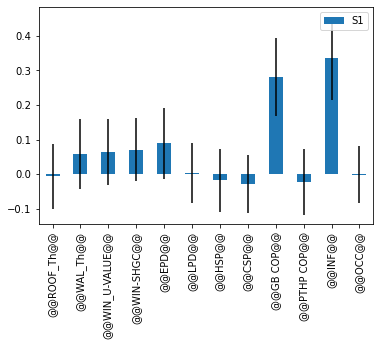

In [9]:
X_rbd_fast= arr[0:364,1:13]
Y_rbd_fast= arr[0:364,15]
Si_rbd_fast = rbd_fast.analyze(ishigami_problem, X_rbd_fast, Y_rbd_fast, M=12,print_to_console = True)
Si_rbd_fast_result = pd.DataFrame(Si_rbd_fast)
Si_rbd_fast_result
Si_rbd_fast.plot()